In [1]:
from autoreduce import *
import numpy as np
from sympy import symbols

In [2]:
n = 8 # Number of states 
x_init = np.zeros(n)
x_init[6] = 100
x_init[7] = 500
timepoints_ode = np.linspace(0, 40, 100)
error_tol = 1000
nstates_tol = 5
#      x = 0, T1, 1, A1, 2, S1, 3, S2, 4, T2, 5, A2, 6, C1, 7, C2
#      P = 0, beta_S1, 1, l_S1, 2, K_S1, 3, kb, 4, beta_S2, 5, l_S2, 6,
#      K_S2, 7, beta_lac, 8, l_lac, 9, K_lac, 10, beta_tet, 11, l_tet, 12,
#      K_tet, 13, kc, 14, C_max, 15, dc, 16, 17, I, 18, atc, 20,K_tox
P = np.zeros(22)
P[0] = 6
P[1] = 2e-3
P[2] = 430
P[3] = 30
P[4] = 6
P[5] = 2e-3
P[6] = 190
P[7] = 19.8e-3
P[8] = 1.5e-3
P[9] = 1.4e5
P[10] = 14.4e-3
P[11] = 2.1e-4
P[12] = 13
P[13] = 0.6
P[14] = 5500
P[15] = 0.8
P[16] = 1e6 #17 -> 16
P[17] = 324 # 19 -> 17
P[18] = 1 #20 -> 18
P[19] = 0.1 #21 -> 19
P[20] = 1.5 #22 -> 20
P[21] = 0.5 #23 ->21
params_values = P.copy()

params = P
n = 8
x, f, P = system.load_ODE_model(n, len(params_values))

beta_S1 = symbols('beta_S1')
l_S1 = symbols('l_S1')
K_S1 = symbols('K_S1')
kb = symbols('kb')
beta_S2 = symbols('beta_S2')
l_S2 = symbols('l_S2')
K_S2 = symbols('K_S2')
beta_lac = symbols('beta_lac')
l_lac = symbols('l_lac')
K_lac = symbols('K_lac')
beta_tet = symbols('beta_tet')
l_tet = symbols('l_tet')
K_tet = symbols('K_tet')
kc = symbols('kc')
C_max = symbols('C_max')
dc = symbols('dc')
I = symbols('I')
atc = symbols('atc')
K_tox = symbols('K_tox')
d = symbols('d')
d_T = symbols('d_T')
d_S = symbols('d_S')
P = [beta_S1, l_S1, K_S1, kb, beta_S2, l_S2, K_S2, beta_lac, l_lac, 
    K_lac, beta_tet, l_tet, K_tet, kc, C_max, dc, I,
    atc, K_tox, d, d_T, d_S]
y0 = symbols('y0')
y1 = symbols('y1')

# T1 and A1
f[0] = P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1] - P[20] * x[0]
f[1] = 5*P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[20] * x[1] - P[3]*x[0]*x[1]


# f[0] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1]
# f[1] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[0]*x[1]

#  S1 and S2 (scaled with cell count)
f[2] = P[7]*(P[8] + P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
f[3] = P[10]*(P[11] + P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

# f[2] = P[7]*(P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
# f[3] = P[10]*(P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

#  T2 and A2
f[4] = P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
f[5] = 5*P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

# f[4] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
# f[5] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

#  Cell 1 and Cell 2
f[6] = P[13]*(1 - (x[6] + x[7])/P[14])*x[6] - P[15]*x[6]*(x[0]/(P[18] + x[0])) - P[19] * x[6]
f[7] = P[13]*(1 - (x[6] + x[7])/P[14])*x[7] - P[15]*x[7]*(x[4]/(P[18] + x[4])) - P[19] * x[7]

C = np.zeros((2,len(x)), dtype=int)
C[0][6] = 1
C[1][7] = 1
C = C.tolist()

sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)

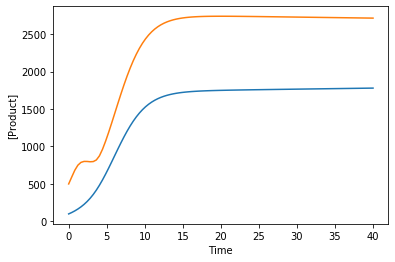

In [4]:
from autoreduce.utils import get_ODE
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
try:
    import matplotlib.pyplot as plt
    plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
    plt.xlabel('Time')
    plt.ylabel('[Product]')
    plt.show()
except:
    print('Plotting libraries missing.')

In [5]:
from autoreduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,5)
sys_ssm = get_SSM(sys, timepoints_ssm)
# Uncomment to run
# Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)

In [8]:
# nouts = 2
# out_Ss = []
# for i in range(len(params)):
#     out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
# out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

In [9]:
# try:
    # import seaborn as sn
    # for j in range(nouts):
    #     sn.heatmap(out_Ss[:,:,j].T)
    #     plt.xlabel('Time')
    #     plt.ylabel('Parameters')
    #     plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    #     plt.show()
# except:
#     print('Plotting libraries missing.')

In [6]:
from autoreduce.utils import get_reducible
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = get_reducible(sys, timepoints_ode, timepoints_ssm)
# Uncomment to run:
# results = sys_reduce.reduce_simple(skip_numerical_computations = True, debug = True)

In [14]:
reduced_sys_1567, collapsed_sys = sys_reduce.solve_timescale_separation([x[1], x[5], x[6], x[7]], debug = False)

Successful time-scale separation solution obtained with states: [x1, x5, x6, x7]!


In [15]:
Se_1567 = sys_reduce.get_robustness_metric(reduced_sys_1567)

SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)
C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\autoreduce\model_reduction.py:217: ComplexWarning: Casting complex values to real discards the imaginary part
  Se[j] = max_eig_P + 2*len(reduced_ssm.timepoints)*S_metric_max


Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [16]:
reduced_sys_0467, collapsed_sys = sys_reduce.solve_timescale_separation([x[0], x[4], x[6], x[7]], debug = False)
reduced_sys_0567, collapsed_sys = sys_reduce.solve_timescale_separation([x[0], x[5], x[6], x[7]], debug = False)
reduced_sys_1467, collapsed_sys = sys_reduce.solve_timescale_separation([x[1], x[4], x[6], x[7]], debug = False)

Successful time-scale separation solution obtained with states: [x0, x4, x6, x7]!
Successful time-scale separation solution obtained with states: [x0, x5, x6, x7]!
Successful time-scale separation solution obtained with states: [x1, x4, x6, x7]!


In [17]:
Se_0467 = sys_reduce.get_robustness_metric(reduced_sys_0467)
Se_0567 = sys_reduce.get_robustness_metric(reduced_sys_0567)
Se_1467 = sys_reduce.get_robustness_metric(reduced_sys_1467)

SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [107]:
reduced_sys_0467.C = np.array([[0., 0., 1., 0],[0., 0., 0, 1.]])
reduced_sys_0567.C = np.array([[0., 0., 1., 0],[0., 0., 0, 1.]])
reduced_sys_1467.C = np.array([[0., 0., 1., 0],[0., 0., 0, 1.]])
reduced_sys_1567.C = np.array([[0., 0., 1., 0],[0., 0., 0, 1.]])

In [108]:
results = {}
results[reduced_sys_0467] = [0, Se_0467]
results[reduced_sys_0567] = [0, Se_0567]
results[reduced_sys_1467] = [0, Se_1467]
results[reduced_sys_1567] = [0, Se_1567]

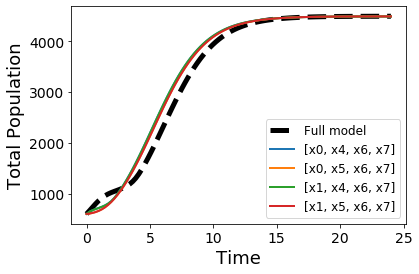

In [137]:
fig, ax = plt.subplots() 
count = 0
# sys.params_values = params_values_new
# sys.x_init[0] = params_values[-3]
# sys.x_init[3] = params_values[-2]
# sys.x_init[5] = params_values[-4]
# print(sys.x_init)
timepoints_ode = np.linspace(0,24,100)
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
_ = plt.plot(timepoints_ode, np.sum(np.transpose(np.array(sys.C)@sol), axis = 1), 'k--', label = 'Full model', linewidth = 5)
for key,value in results.items():
#     error = value[0]
#     if error > 1e-5:
    sys_i = key
    sys_i.params_values = params_values
#         _ = plt.subplots(count%3, count%3)
    sys_i_ode = get_ODE(sys_i, timepoints_ode)
    sol_i = sys_i_ode.solve_system().T
    _ = plt.plot(timepoints_ode, np.sum(np.transpose(np.array(sys_i.C)@sol_i), axis = 1), label = str(sys_i.x), linewidth = 2)
    _ = plt.xlabel('Time', FontSize = 18)
    _ = plt.ylabel('Total Population', FontSize = 18)
    _ = ax.tick_params(axis='both', which='major', labelsize=14)
    _ = plt.legend(prop={'size': 12})
    count += 1

# _ = plt.axvline(x=timepoints_ode[6], color = 'k',linestyle = ':',linewidth = 1.5)
# _ = plt.axvline(x=timepoints_ode[15], color = 'k',linestyle = ':',linewidth = 1.5)
# _ = plt.axvline(x=timepoints_ode[30], color = 'k',linestyle = ':',linewidth = 1.5)
_ = plt.savefig('pop_control_error.svg')
plt.show()


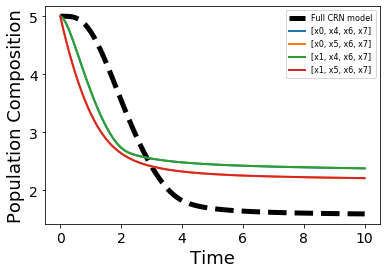

In [134]:
fig, ax = plt.subplots() 
count = 0
# sys.params_values = params_values_new
# sys.x_init[0] = params_values[-3]
# sys.x_init[3] = params_values[-2]
# sys.x_init[5] = params_values[-4]
# print(sys.x_init)
timepoints_ode = np.linspace(0,10,100)
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
_ = plt.plot(timepoints_ode, np.transpose(np.array(sys.C)@sol)[:,1]/np.transpose(np.array(sys.C)@sol)[:,0], 'k--', label = 'Full CRN model', linewidth = 5)
for key,value in results.items():
#     error = value[0]
#     if error > 1e-5:
    sys_i = key
    sys_i.params_values = params_values
#         _ = plt.subplots(count%3, count%3)
    sys_i_ode = get_ODE(sys_i, timepoints_ode)
    sol_i = sys_i_ode.solve_system().T
    _ = plt.plot(timepoints_ode, np.transpose(np.array(sys_i.C)@sol_i)[:,1]/np.transpose(np.array(sys_i.C)@sol_i)[:,0], label = str(sys_i.x), linewidth = 2)
    _ = plt.xlabel('Time', FontSize = 18)
    _ = plt.ylabel('Population Composition', FontSize = 18)
    _ = ax.tick_params(axis='both', which='major', labelsize=14)
    _ = plt.legend(prop={'size': 8})
    count += 1

# _ = plt.axvline(x=timepoints_ode[6], color = 'k',linestyle = ':',linewidth = 1.5)
# _ = plt.axvline(x=timepoints_ode[15], color = 'k',linestyle = ':',linewidth = 1.5)
# _ = plt.axvline(x=timepoints_ode[30], color = 'k',linestyle = ':',linewidth = 1.5)
_ = plt.savefig('pop_control_composition.svg')
plt.show()


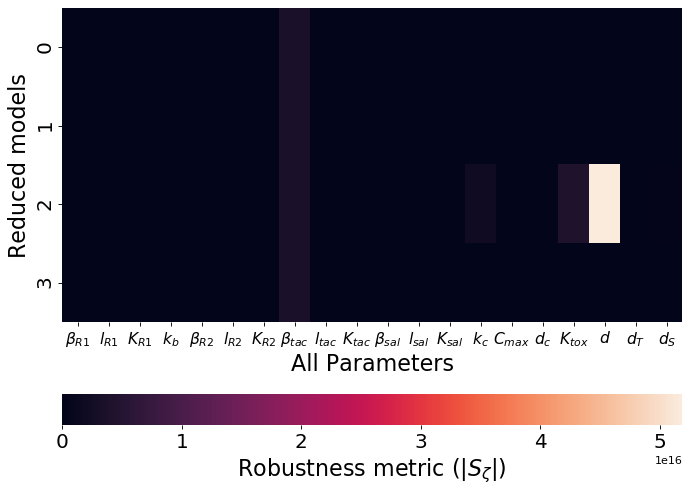

In [138]:
# fig, ax = plt.subplots() 
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# count = 0
import seaborn as sn
# params_names = ['$'+str(i)+'$' for i in params]
# beta_S1 = symbols('beta_S1')
# l_S1 = symbols('l_S1')
# K_S1 = symbols('K_S1')
# kb = symbols('kb')
# beta_S2 = symbols('beta_S2')
# l_S2 = symbols('l_S2')
# K_S2 = symbols('K_S2')
# beta_lac = symbols('beta_lac')
# l_lac = symbols('l_lac')
# K_lac = symbols('K_lac')
# beta_tet = symbols('beta_tet')
# l_tet = symbols('l_tet')
# K_tet = symbols('K_tet')
# kc = symbols('kc')
# C_max = symbols('C_max')
# dc = symbols('dc')
# I = symbols('I')
# atc = symbols('atc')
# K_tox = symbols('K_tox')
# d = symbols('d')
# d_T = symbols('d_T')
# d_S = symbols('d_S')
params_names = ['$\\beta_{R1}$', '$l_{R1}$', '$K_{R1}$', '$k_{b}$', '$\\beta_{R2}$', '$l_{R2}$', '$K_{R2}$',
                '$\\beta_{tac}$', '$l_{tac}$', '$K_{tac}$', 
                '$\\beta_{sal}$', '$l_{sal}$', '$K_{sal}$', 
                 '$k_c$', '$C_{max}$', '$d_c$',
                '$K_{tox}$', '$d$', '$d_T$', '$d_S$'
               ]

rob_2d_all = []
rob_2d = []
sys_reduced_x = []
# plt.plot(timepoints_ode, np.transpose(np.array(sys_reduce.C)@sol), 'k--', label = 'Full CRN model', linewidth = 5)
# params_names[0] = '$k_b$'
for key,value in results.items():
    sys_i = key
    Se = value[1]
    Se = np.delete(Se, [16])
    Se = np.delete(Se, [16])
    sys_reduced_x.append(str(sys_i.x))
    rob_2d.append(Se)
# rob_2d = [ Se_x, Se_tx, Se_rx, Se_px]
sn_ax = sn.heatmap(np.array(rob_2d), cbar_kws={'label': 'Robustness metric ($\|S_{\zeta}\|$)', 
                                               'orientation':'horizontal','fraction':0.2,
                                               })

# cbar_axes = sn_ax.figure.axes[-1]
sn_ax.figure.axes[-1].xaxis.label.set_size(20)
ax = fig.axes
_ = plt.xlabel('All Parameters', FontSize = 20)
_ = plt.ylabel('Reduced models', FontSize = 20)
_ = ax[0].tick_params(axis='x', which='major', labelsize=14)
_ = ax[0].tick_params(axis='y', which='major', labelsize=18)
_ = ax[0].set_xticklabels(params_names)
_ = ax[1].tick_params(axis = 'x', labelsize = 18)
bottom, top = ax[0].get_ylim()
# ax[0].set_ylim(bottom + 0.5, top - 0.5)
# _ = ax[0].set_yticklabels(sys_reduced_x, rotation = 0)
# h.set_rotation(0)
_ = plt.savefig('pop_control_robustness1.svg')
plt.show()

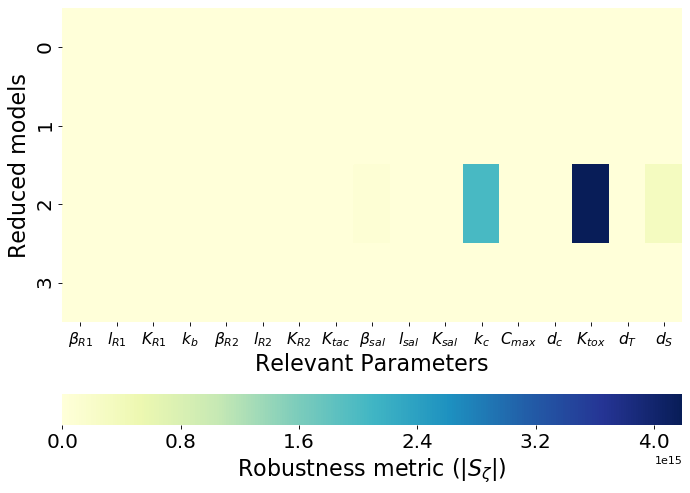

In [58]:
# fig, ax = plt.subplots() 
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# count = 0
import seaborn as sn
# params_names = ['$'+str(i)+'$' for i in params]
# beta_S1 = symbols('beta_S1')
# l_S1 = symbols('l_S1')
# K_S1 = symbols('K_S1')
# kb = symbols('kb')
# beta_S2 = symbols('beta_S2')
# l_S2 = symbols('l_S2')
# K_S2 = symbols('K_S2')
# beta_lac = symbols('beta_lac')
# l_lac = symbols('l_lac')
# K_lac = symbols('K_lac')
# beta_tet = symbols('beta_tet')
# l_tet = symbols('l_tet')
# K_tet = symbols('K_tet')
# kc = symbols('kc')
# C_max = symbols('C_max')
# dc = symbols('dc')
# I = symbols('I')
# atc = symbols('atc')
# K_tox = symbols('K_tox')
# d = symbols('d')
# d_T = symbols('d_T')
# d_S = symbols('d_S')
params_names = ['$\\beta_{R1}$', '$l_{R1}$', '$K_{R1}$', '$k_{b}$', '$\\beta_{R2}$', '$l_{R2}$', '$K_{R2}$',
                '$K_{tac}$', 
                '$\\beta_{sal}$', '$l_{sal}$', '$K_{sal}$', 
                 '$k_c$', '$C_{max}$', '$d_c$',
                '$K_{tox}$', '$d_T$', '$d_S$'
               ]

rob_2d_all = []
rob_2d = []
sys_reduced_x = []
# plt.plot(timepoints_ode, np.transpose(np.array(sys_reduce.C)@sol), 'k--', label = 'Full CRN model', linewidth = 5)
# params_names[0] = '$k_b$'
for key,value in results.items():
    sys_i = key
    Se = value[1]
    Se = np.delete(Se, [16])
    Se = np.delete(Se, [16])
    Se = np.delete(Se, [17])
    Se = np.delete(Se, [7])
    Se = np.delete(Se, [7])
#     if len(sys_i.x) >= 4:
#         continue
    sys_reduced_x.append(str(sys_i.x))
    rob_2d.append(Se)
# rob_2d = [ Se_x, Se_tx, Se_rx, Se_px]
sn_ax = sn.heatmap(np.array(rob_2d), cmap="YlGnBu",cbar_kws={'label': 'Robustness metric ($\|S_{\zeta}\|$)', 
                                               'orientation':'horizontal','fraction':0.2,
                                               })

# cbar_axes = sn_ax.figure.axes[-1]
sn_ax.figure.axes[-1].xaxis.label.set_size(20)
ax = fig.axes
_ = plt.xlabel('Relevant Parameters', FontSize = 20)
_ = plt.ylabel('Reduced models', FontSize = 20)
_ = ax[0].tick_params(axis='x', which='major', labelsize=14)
_ = ax[0].tick_params(axis='y', which='major', labelsize=18)
_ = ax[0].set_xticklabels(params_names)
_ = ax[1].tick_params(axis = 'x', labelsize = 18)
bottom, top = ax[0].get_ylim()
# ax[0].set_ylim(bottom + 0.5, top - 0.5)
# _ = ax[0].set_yticklabels(sys_reduced_x, rotation = 0)
# h.set_rotation(0)
_ = plt.savefig('pop_control_robustness.svg')
plt.show()

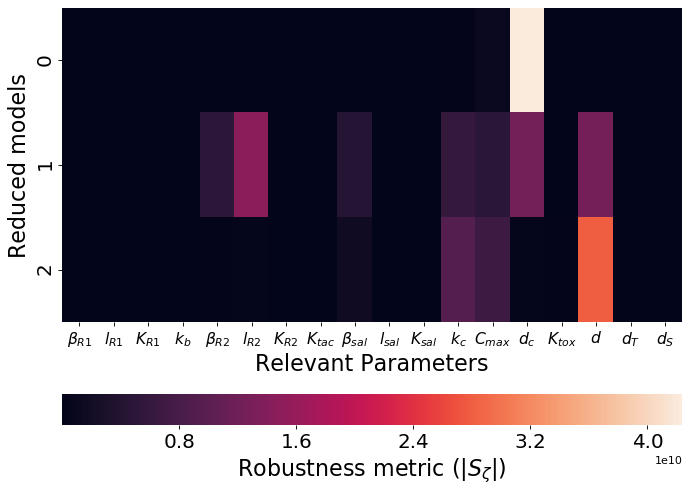

In [60]:
# fig, ax = plt.subplots() 
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# count = 0
import seaborn as sn
# params_names = ['$'+str(i)+'$' for i in params]
# beta_S1 = symbols('beta_S1')
# l_S1 = symbols('l_S1')
# K_S1 = symbols('K_S1')
# kb = symbols('kb')
# beta_S2 = symbols('beta_S2')
# l_S2 = symbols('l_S2')
# K_S2 = symbols('K_S2')
# beta_lac = symbols('beta_lac')
# l_lac = symbols('l_lac')
# K_lac = symbols('K_lac')
# beta_tet = symbols('beta_tet')
# l_tet = symbols('l_tet')
# K_tet = symbols('K_tet')
# kc = symbols('kc')
# C_max = symbols('C_max')
# dc = symbols('dc')
# I = symbols('I')
# atc = symbols('atc')
# K_tox = symbols('K_tox')
# d = symbols('d')
# d_T = symbols('d_T')
# d_S = symbols('d_S')
params_names = ['$\\beta_{R1}$', '$l_{R1}$', '$K_{R1}$', '$k_{b}$', '$\\beta_{R2}$', '$l_{R2}$', '$K_{R2}$',
                '$K_{tac}$', 
                '$\\beta_{sal}$', '$l_{sal}$', '$K_{sal}$', 
                 '$k_c$', '$C_{max}$', '$d_c$',
                '$K_{tox}$', '$d$', '$d_T$', '$d_S$'
               ]

rob_2d_all = []
rob_2d = []
sys_reduced_x = []
# plt.plot(timepoints_ode, np.transpose(np.array(sys_reduce.C)@sol), 'k--', label = 'Full CRN model', linewidth = 5)
# params_names[0] = '$k_b$'
for key,value in results.items():
    sys_i = key
    Se = value[1]
    Se = np.delete(Se, [16])
    Se = np.delete(Se, [16])
    Se = np.delete(Se, [7])
    Se = np.delete(Se, [7])
    if sys_i == reduced_sys_1467:
        continue
    sys_reduced_x.append(str(sys_i.x))
    rob_2d.append(Se)
# rob_2d = [ Se_x, Se_tx, Se_rx, Se_px]
sn_ax = sn.heatmap(np.array(rob_2d), cbar_kws={'label': 'Robustness metric ($\|S_{\zeta}\|$)', 
                                               'orientation':'horizontal','fraction':0.2,
                                               })

# cbar_axes = sn_ax.figure.axes[-1]
sn_ax.figure.axes[-1].xaxis.label.set_size(20)
ax = fig.axes
_ = plt.xlabel('Relevant Parameters', FontSize = 20)
_ = plt.ylabel('Reduced models', FontSize = 20)
_ = ax[0].tick_params(axis='x', which='major', labelsize=14)
_ = ax[0].tick_params(axis='y', which='major', labelsize=18)
_ = ax[0].set_xticklabels(params_names)
_ = ax[1].tick_params(axis = 'x', labelsize = 18)
bottom, top = ax[0].get_ylim()
# ax[0].set_ylim(bottom + 0.5, top - 0.5)
# _ = ax[0].set_yticklabels(sys_reduced_x, rotation = 0)
# h.set_rotation(0)
_ = plt.savefig('pop_control_robustness2.svg')
plt.show()

In [139]:
Se = np.array(Se_0467)
Se = np.delete(Se, [16])
Se = np.delete(Se, [16])
Se = np.delete(Se, [7])
Se = np.delete(Se, [7])
np.sum(Se)#/np.max(Se)

43909785610.40579

In [140]:
Se = np.array(Se_0567)
Se = np.delete(Se, [16])
Se = np.delete(Se, [16])
Se = np.delete(Se, [7])
Se = np.delete(Se, [7])
np.sum(Se)
# /np.max(Se)

59844157626.83096

In [141]:
Se = np.array(Se_1467)
Se = np.delete(Se, [16])
Se = np.delete(Se, [16])
Se = np.delete(Se, [7])
Se = np.delete(Se, [7])
np.sum(Se)#/np.max(Se)

5.8524912484795736e+16

In [142]:
Se = np.array(Se_1567)
Se = np.delete(Se, [16])
Se = np.delete(Se, [16])
Se = np.delete(Se, [7])
Se = np.delete(Se, [7])
np.sum(Se)#/np.max(Se)

47101313026.60535

In [143]:
%store Se_0467 

Stored 'Se_0467' (ndarray)


In [144]:
%store Se_0567 

Stored 'Se_0567' (ndarray)


In [145]:
%store Se_1467 

Stored 'Se_1467' (ndarray)


In [146]:
%store Se_1567 

Stored 'Se_1567' (ndarray)
